# Classification Algorithms using scikit-learn

### Importing dependencies

In [755]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
import time
import seaborn as sns
from sklearn.datasets import fetch_olivetti_faces
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

### Loading the dataset

In our dataset, the `Weather Type` column serves as the target variable, while all other columns represent the various features that contribute to predicting this target. Each feature offers unique insights and data points that help us understand and forecast different weather conditions with greater accuracy. By analyzing and leveraging these features, we aim to build a robust predictive model to classify and anticipate weather types effectively.

In [511]:
df = pd.read_csv("weather_classification_data.csv")
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


To gain a clearer understanding of our target variable, `Weather Type`, let's explore its unique values. This will provide insights into the number of distinct classes present, helping us understand the classification complexity and guide our modeling approach. By examining the diversity of `Weather Type`, we can better tailor our strategies for accurate prediction and analysis.

In [421]:
df["Weather Type"].unique()

array(['Rainy', 'Cloudy', 'Sunny', 'Snowy'], dtype=object)

## Preprocessing

### Checking Null Values in the Dataset

Handling null values in your dataset is crucial for training effective machine learning models. Missing values can lead to inaccurate models, errors during training, and skewed evaluations. Here’s a guide on how to address null values in your dataset:

1. **Identify Null Values**:
   - Use methods to identify the presence and quantity of null values in your dataset. This will help you understand the extent of missing data.

2. **Analyze the Impact**:
   - Assess how null values affect your dataset and model. Determine if they are random or if there's a pattern, and understand their potential impact on model performance.

3. **Choose a Strategy for Handling Null Values**:
   - **Removal**: If the number of missing values is small, you might choose to remove rows or columns with null values.
   - **Imputation**: Replace missing values with a statistical measure (mean, median, mode) or use advanced imputation techniques based on the data distribution.
   - **Prediction**: Use machine learning models to predict and fill in missing values based on other features in the dataset.

4. **Implement and Validate**:
   - Apply the chosen strategy and validate the impact on the dataset. Ensure that the handling of null values improves or maintains the quality of your data for model training.

5. **Document Your Approach**:
   - Keep a record of the methods used to handle missing values, as this will be important for reproducibility and understanding the data phine learning models.

In [516]:
df.isna().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [518]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [520]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


### Finding the categorical columns as we need to feed the numbers to our data
To prepare your dataset for machine learning, start by identifying categorical columns, which are typically non-numeric and can be detected using Pandas. Next, inspect the unique values in these columns to understand their distribution. Convert categorical data into numerical format by using label encoding for columns with a few categories or one-hot encoding for those with many categories. Finally, validate that all columns are now numerical and suitable for model training, ensuring your dataset is properly prepared for the next steps.

In [523]:
categorical_columnns  = [cols for cols in df.columns if df[cols].dtype == "object"]
categorical_columnns

['Cloud Cover', 'Season', 'Location', 'Weather Type']

### Encoding the categorical columns using the Label Encoder()
To encode categorical columns using `LabelEncoder()`, start by importing the `LabelEncoder` from scikit-learn. Initialize the encoder and then apply it to each categorical column in your dataset. Fit the encoder to the column and transform the categorical values into numerical labels. Finally, verify the transformation by checking the unique values in the column to ensure that the categorical data has been successfully converted into numerical format. This process will prepare your data for machine learning algorithms that require numerical input.

In [528]:
enco = LabelEncoder()
for i in categorical_columnns:
    df[i] = enco.fit_transform(df[i])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  int64  
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  int64  
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  int64  
 10  Weather Type          13200 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 1.1 MB


In [530]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,3,1010.82,2,3,3.5,1,1
1,39.0,96,8.5,71.0,3,1011.43,7,1,10.0,1,0
2,30.0,64,7.0,16.0,0,1018.72,5,1,5.5,2,3
3,38.0,83,1.5,82.0,0,1026.25,7,1,1.0,0,3
4,27.0,74,17.0,66.0,2,990.67,1,3,2.5,2,1


### We've a lot of features, let's see the correlation and find the more related features, so it'll help to decrese the computional cost
To optimize computational costs, start by calculating the correlation matrix for all features to understand their relationships. Visualize this matrix using a heatmap, which makes it easier to identify features with high correlations. Look for pairs of features with strong correlations (close to 1 or -1), as these are often redundant. Based on this analysis, select the most relevant features to reduce dimensionality and computational overhead while retaining essential information. After reducing the feature set, recheck your dataset to ensure that the remaining features provide sufficient information for accurate modeling. This approach will help streamline your dataset and improve model efficiency.

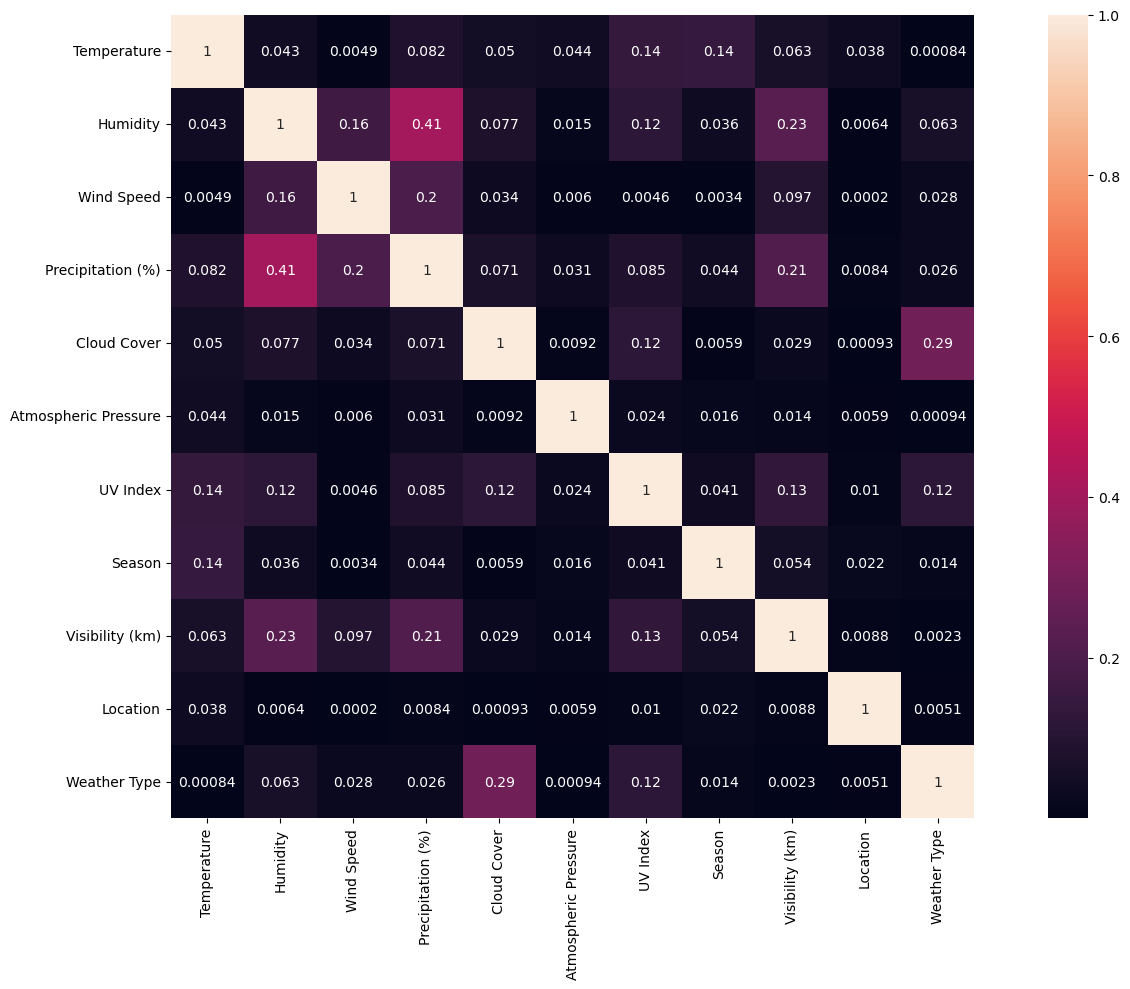

In [533]:
corr = df.corr().abs()
corr = corr ** 2
plt.figure(figsize = (15,10))
sns.heatmap(corr, annot=True, square = True)
plt.tight_layout()
plt.show()

#### Let's extract the features who's R Squred relationn is more than 0.01, yeah it's very low value, but our data is like this
To streamline your feature set, start by calculating the R-squared values for each feature's relationship with the target variable. This can be achieved using a linear regression model for each feature. Filter out the features with R-squared values greater than 0.01, as this threshold suits your dataset's characteristics. Once you've identified these significant features, create a reduced dataset that includes only these features along with the target variable. Finally, verify the reduced dataset to ensure it retains essential information for accurate modeling while minimizing redundancy and computational costs. This approach helps simplify your model and improve efficiency in your data analysis.

In [536]:
feature_selection = [cols for cols in corr.columns if abs(corr[cols]["Weather Type"] >= 0.01)]
print(f" Best Features with correlation more than 0.3: {feature_selection}\n")
df[feature_selection].head()

 Best Features with correlation more than 0.3: ['Humidity', 'Wind Speed', 'Precipitation (%)', 'Cloud Cover', 'UV Index', 'Season', 'Weather Type']



,Humidity,Wind Speed,Precipitation (%),Cloud Cover,UV Index,Season,Weather Type
0,73,9.5,82.0,3,2,3,1
1,96,8.5,71.0,3,7,1,0
2,64,7.0,16.0,0,5,1,3
3,83,1.5,82.0,0,7,1,3
4,74,17.0,66.0,2,1,3,1


In [538]:
df = df[feature_selection]
df

,Humidity,Wind Speed,Precipitation (%),Cloud Cover,UV Index,Season,Weather Type
0,73,9.5,82.0,3,2,3,1
1,96,8.5,71.0,3,7,1,0
2,64,7.0,16.0,0,5,1,3
3,83,1.5,82.0,0,7,1,3
4,74,17.0,66.0,2,1,3,1
...,...,...,...,...,...,...,...
13195,74,14.5,71.0,2,1,2,1
13196,76,3.5,23.0,1,1,3,2
13197,77,5.5,28.0,2,3,0,0
13198,76,10.0,94.0,2,0,3,2


## Spliting the X and Y
To prepare your dataset for machine learning, start by separating your data into features (X) and the target variable (Y). Use the feature columns as X and the target column as Y. Next, split the data into training and testing sets using scikit-learn’s `train_test_split`, which helps ensure that the model can be trained on one portion of the data and evaluated on another. This step is crucial for assessing the model’s performance on unseen data. Finally, verify that the split is appropriately sized and that the distribution of the target variable is preserved, ensuring a robust and fair evaluation of your model.

In [541]:
x = df.drop("Weather Type", axis = 1)
y = df["Weather Type"]

# spliting into training and testing datasets
To split your dataset into training and testing sets, first, divide your features (X) and target variable (Y). Use scikit-learn's `train_test_split` function to partition the data into training and testing datasets. This approach helps in training the model on one portion of the data while reserving another portion for evaluation, ensuring that you can assess the model's performance on unseen data. It’s essential to check that the split maintains the distribution of the target variable and that the sizes of the datasets are suitable for effective model training and testing. This process ensures a reliable and unbiased evaluation of your machine learning model.

In [546]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Classification using LogisticRegression
To perform classification using Logistic Regression, start by initializing the Logistic Regression model from scikit-learn. Train the model on your training dataset, which involves fitting it to the features (X_train) and target variable (Y_train). After training, evaluate the model's performance on the testing dataset (X_test and Y_test) to assess its accuracy and effectiveness. This evaluation typically involves metrics such as accuracy, precision, recall, and F1 score. By applying Logistic Regression, you can classify data into distinct categories based on the learned relationships between features and the target variable, providing valuable insights and predictions for your dataset.

In [697]:
# Create Model
start = time.time()
model_linear = LogisticRegression(max_iter=10000)
model_linear.fit(X_train, y_train)
end = time.time()
time_linear = end - start
print(f"Time Taken by the model: {time_linear}")

Time Taken by the model: 12.204022407531738


In [698]:
# Predict
y_pred = model_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred)*100
print(f'Accuracy: {accuracy_linear}')

Accuracy: 76.51515151515152


# Classification using KNeighborsClassifier
To perform classification using the K-Nearest Neighbors (KNN) algorithm with `KNeighborsClassifier`, start by initializing the classifier from scikit-learn. The KNN algorithm classifies data based on the majority class among its 'k' nearest neighbors in the feature space. Fit the model on your training dataset, which includes the features (X_train) and target variable (Y_train). After training, assess the model's performance using the testing dataset (X_test and Y_test) to evaluate metrics such as accuracy, precision, recall, and F1 score. KNN is a simple yet effective algorithm that makes predictions by comparing the similarity of data points, making it suitable for various classification tasks.

In [700]:
# Create Model
start = time.time()
model_k = KNeighborsClassifier(n_neighbors=9)
model_k.fit(X_train, y_train)
end = time.time()
time_k = end - start
print(f"Time Taken by the model: {time_k}")

Time Taken by the model: 0.07895398139953613


In [701]:
# Predict
y_pred = model_k.predict(X_test)
accuracy_k = accuracy_score(y_test, y_pred)*100
print(f'Accuracy: {accuracy_k}')

Accuracy: 74.96212121212122


# Classification using SVC
To perform classification using Support Vector Classification (SVC), begin by initializing the SVC model from scikit-learn. The SVC algorithm works by finding the optimal hyperplane that best separates different classes in the feature space. This hyperplane is chosen to maximize the margin between the classes, which helps in achieving better generalization on unseen data. Fit the model using your training dataset, including the features (X_train) and target variable (Y_train). After training, evaluate the model's performance on the testing dataset (X_test and Y_test) to determine its accuracy and other relevant metrics such as precision, recall, and F1 score. SVC is particularly effective in high-dimensional spaces and can handle both linear and non-linear classification tasks through different kernel functions.

In [703]:
# Create Model
start = time.time()
model_svc = SVC(kernel='linear')
model_svc.fit(X_train, y_train)
end = time.time()
time_svc = end - start
print(f"Time Taken by the model: {time_svc}")

Time Taken by the model: 64.25027346611023


In [704]:
# Predict
y_pred = model.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred)*100
print(f'Accuracy: {accuracy_svc}')

Accuracy: 79.84848484848484


# Classification using DecisionTreeClassifier
To perform classification using the DecisionTreeClassifier, start by initializing the classifier from scikit-learn. The Decision Tree algorithm classifies data by constructing a tree-like model of decisions and their possible consequences. It splits the feature space into distinct regions based on feature values, creating branches that lead to decision nodes and ultimately to class labels. Fit the model using your training dataset, which includes the features (X_train) and target variable (Y_train). After training, evaluate the model’s performance on the testing dataset (X_test and Y_test) to assess accuracy and other metrics such as precision, recall, and F1 score. Decision Trees are versatile and can handle both numerical and categorical data, offering a clear, interpretable structure for classification tasks.

In [706]:
# Create Model
start = time.time()
model_d = DecisionTreeClassifier()
model_d.fit(X_train, y_train)
end = time.time()
time_d = end - start
print(f"Time Taken by the model: {time_d}")

Time Taken by the model: 0.07095909118652344


In [707]:
# Predict
y_pred = model.predict(X_test)
accuracy_d = accuracy_score(y_test, y_pred)*100
print(f'Accuracy: {accuracy_d}')

Accuracy: 79.84848484848484


# Classification using RandomForestClassifier
To perform classification using the RandomForestClassifier, begin by initializing the classifier from scikit-learn. The Random Forest algorithm constructs an ensemble of decision trees, each trained on a random subset of the data with randomly selected features. During classification, each tree in the forest votes on the class label, and the class with the majority votes is selected as the final prediction. Fit the model using your training dataset, which includes the features (X_train) and target variable (Y_train). After training, evaluate the model’s performance on the testing dataset (X_test and Y_test) to determine accuracy and other metrics such as precision, recall, and F1 score. Random Forests provide robust and accurate predictions by leveraging the combined wisdom of multiple decision trees, reducing overfitting and improving generalization.

In [709]:
# Create Model
start = time.time()
model_r = RandomForestClassifier(n_estimators=1000)
model_r.fit(X_train, y_train)
end = time.time()
time_r = end - start
print(f"Time Taken by the model: {time_r}")

Time Taken by the model: 16.66946792602539


In [710]:
# Predict
y_pred = model.predict(X_test)
accuracy_r = accuracy_score(y_test, y_pred)*100
print(f'Accuracy: {accuracy_r}')

Accuracy: 79.84848484848484


# Classification using GradientBoostingClassifier
To perform classification using the GradientBoostingClassifier, start by initializing the classifier from scikit-learn. The Gradient Boosting algorithm builds an ensemble of decision trees sequentially, where each new tree corrects the errors made by the previous trees. This process involves fitting the model on residual errors, which helps improve prediction accuracy by focusing on the mistakes of earlier models. Train the model using your training dataset, including the features (X_train) and target variable (Y_train). After training, assess the model's performance on the testing dataset (X_test and Y_test) to evaluate metrics such as accuracy, precision, recall, and F1 score. Gradient Boosting provides powerful predictive capabilities by combining the strengths of multiple trees and iteratively refining the model.

In [712]:
# Create Model
start = time.time()
model_g = GradientBoostingClassifier()
model_g.fit(X_train, y_train)
end = time.time()
time_g = end - start
print(f"Time Taken by the model: {time_g}")

Time Taken by the model: 6.2324347496032715


In [713]:
# Predict
y_pred = model.predict(X_test)
accuracy_g = accuracy_score(y_test, y_pred)*100
print(f'Accuracy: {accuracy_g}')

Accuracy: 79.84848484848484


# Classification using GaussianNB
To perform classification using Gaussian Naive Bayes (GaussianNB), start by initializing the classifier from scikit-learn. GaussianNB is based on Bayes' theorem with the assumption that features follow a normal (Gaussian) distribution. The algorithm calculates the probability of each class given the feature values and selects the class with the highest probability as the prediction. Train the model using your training dataset, which includes the features (X_train) and target variable (Y_train). After training, evaluate the model’s performance on the testing dataset (X_test and Y_test) to assess accuracy and other metrics such as precision, recall, and F1 score. GaussianNB is particularly effective for datasets where features are normally distributed and provides a straightforward approach to classification with strong probabilistic foundations.

In [715]:
# Create Model
start = time.time()
model_ga = GaussianNB()
model_ga.fit(X_train, y_train)
end = time.time()
time_ga = end - start
print(f"Time Taken by the model: {time_ga}")

Time Taken by the model: 0.026984214782714844


In [716]:
# Predict
y_pred = model.predict(X_test)
accuracy_ga = accuracy_score(y_test, y_pred)*100
print(f'Accuracy: {accuracy_ga}')

Accuracy: 79.84848484848484


In [733]:
df_a = pd.DataFrame([[accuracy_linear, accuracy_k, accuracy_svc, accuracy_d, accuracy_r, accuracy_g, accuracy_ga],
                    [time_linear, time_k, time_svc, time_d, time_r, time_g, time_ga]],
                    columns = ["Logistic Regression", "KNN", "SVC", "Decision Tree", "Random Forest", "Gradient Boost", "Guassian"])
df_a

,Logistic Regression,KNN,SBC,Decision Tree,Random Forest,Gradient Boost,Guassian
0,76.515152,74.962121,79.848485,79.848485,79.848485,79.848485,79.848485
1,12.204022,0.078954,64.250273,0.070959,16.669468,6.232435,0.026984


# Visulization of the model output

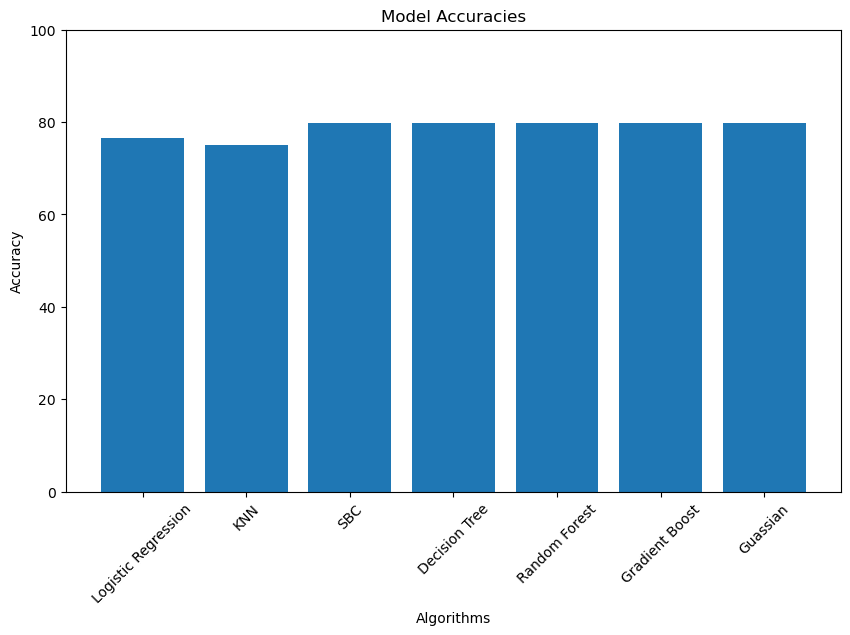

In [722]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(df_a.columns, df_a.iloc[0])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.xticks(rotation=45)
plt.ylim(0, 100)  # Adjust based on your accuracy range
plt.show()

# Time Taken by the models

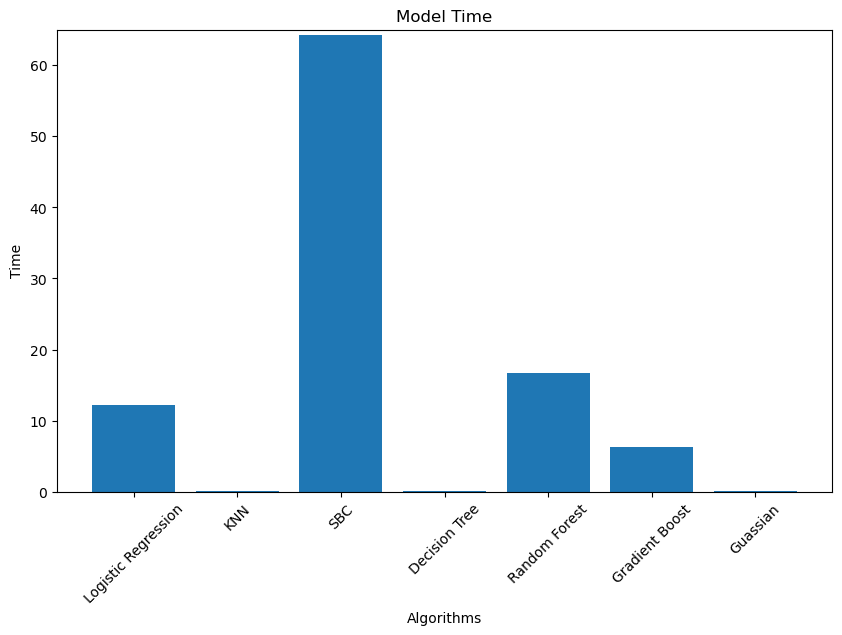

In [739]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(df_a.columns, df_a.iloc[1])
plt.xlabel('Algorithms')
plt.ylabel('Time')
plt.title('Model Time')
plt.xticks(rotation=45)
plt.ylim(0, 65)  # Adjust based on your accuracy range
plt.show()

# The scatter plot showing the relation between the time and the accuracy of the model

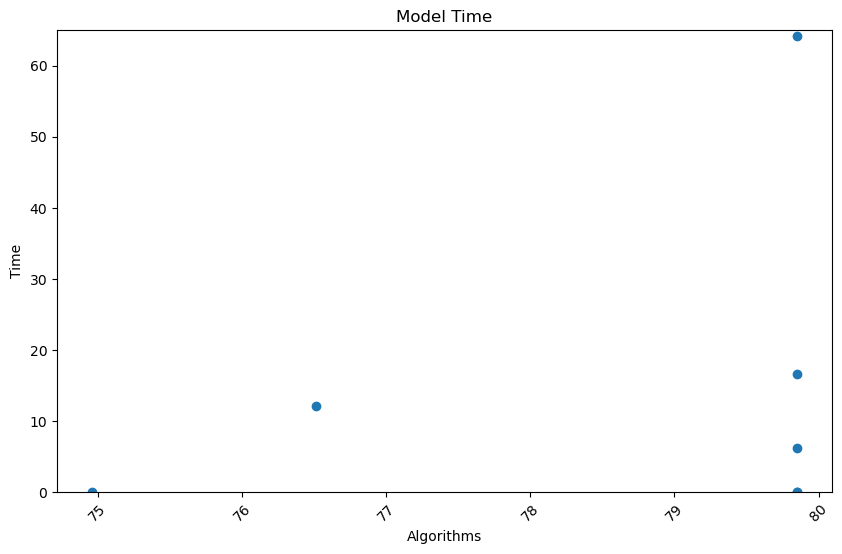

In [748]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df_a.iloc[0], df_a.iloc[1])
plt.xlabel('Algorithms')
plt.ylabel('Time')
plt.title('Model Time')
plt.xticks(rotation=45)
plt.ylim(0, 65)  # Adjust based on your accuracy range
plt.show()

# Another Data Set Larget Dataset realtime dataset

# Every thing is describe above, so i'll just write the code in this example

In [761]:
df = pd.read_csv("campaign_data.csv")
df.head()

,CampaignID,GoalAmount,RaisedAmount,DurationDays,NumBackers,Category,LaunchMonth,Country,Currency,OwnerExperience,VideoIncluded,SocialMediaPresence,NumUpdates,IsSuccessful
0,CID_00000,76159,73518.028955,15,1903,Film,September,Australia,GBP,11,Yes,41758,3,0
1,CID_00001,69394,60068.683288,49,469,Art,October,Australia,GBP,7,Yes,79112,48,0
2,CID_00002,18652,22958.153470,58,148,Film,February,USA,EUR,17,No,3942,9,1
3,CID_00003,19487,24229.048390,39,780,Film,October,Germany,AUD,10,No,22047,35,1
4,CID_00004,26734,17984.630311,68,1622,Games,September,Australia,AUD,12,Yes,72568,17,0


In [764]:
df["IsSuccessful"].unique()

array([0, 1], dtype=int64)

In [766]:
df.isna().sum()

CampaignID             0
GoalAmount             0
RaisedAmount           0
DurationDays           0
NumBackers             0
Category               0
LaunchMonth            0
Country                0
Currency               0
OwnerExperience        0
VideoIncluded          0
SocialMediaPresence    0
NumUpdates             0
IsSuccessful           0
dtype: int64

In [768]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CampaignID           100000 non-null  object 
 1   GoalAmount           100000 non-null  int64  
 2   RaisedAmount         100000 non-null  float64
 3   DurationDays         100000 non-null  int64  
 4   NumBackers           100000 non-null  int64  
 5   Category             100000 non-null  object 
 6   LaunchMonth          100000 non-null  object 
 7   Country              100000 non-null  object 
 8   Currency             100000 non-null  object 
 9   OwnerExperience      100000 non-null  int64  
 10  VideoIncluded        100000 non-null  object 
 11  SocialMediaPresence  100000 non-null  int64  
 12  NumUpdates           100000 non-null  int64  
 13  IsSuccessful         100000 non-null  int64  
dtypes: float64(1), int64(7), object(6)
memory usage: 10.7+ MB


In [770]:
df.describe()

,GoalAmount,RaisedAmount,DurationDays,NumBackers,OwnerExperience,SocialMediaPresence,NumUpdates,IsSuccessful
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50538.001310,50598.121803,52.047370,1003.347340,9.489130,50077.301010,24.483230,0.500940
std,28613.822592,33255.277493,21.653238,574.485153,5.763538,28767.521522,14.413833,0.500002
min,1000.000000,528.632349,15.000000,10.000000,0.000000,100.000000,0.000000,0.000000
25%,25724.750000,23396.500017,33.000000,505.000000,4.000000,25276.750000,12.000000,0.000000
50%,50706.000000,45980.674476,52.000000,1003.000000,9.000000,50024.500000,25.000000,1.000000
75%,75316.000000,72790.183158,71.000000,1502.000000,14.000000,74934.250000,37.000000,1.000000
max,99999.000000,149238.361559,89.000000,1999.000000,19.000000,99999.000000,49.000000,1.000000


In [772]:
categorical_columnns  = [cols for cols in df.columns if df[cols].dtype == "object"]
categorical_columnns

['CampaignID',
 'Category',
 'LaunchMonth',
 'Country',
 'Currency',
 'VideoIncluded']

In [774]:
enco = LabelEncoder()
for i in categorical_columnns:
    df[i] = enco.fit_transform(df[i])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CampaignID           100000 non-null  int32  
 1   GoalAmount           100000 non-null  int64  
 2   RaisedAmount         100000 non-null  float64
 3   DurationDays         100000 non-null  int64  
 4   NumBackers           100000 non-null  int64  
 5   Category             100000 non-null  int32  
 6   LaunchMonth          100000 non-null  int32  
 7   Country              100000 non-null  int32  
 8   Currency             100000 non-null  int32  
 9   OwnerExperience      100000 non-null  int64  
 10  VideoIncluded        100000 non-null  int32  
 11  SocialMediaPresence  100000 non-null  int64  
 12  NumUpdates           100000 non-null  int64  
 13  IsSuccessful         100000 non-null  int64  
dtypes: float64(1), int32(6), int64(7)
memory usage: 8.4 MB


In [776]:
df.head()

,CampaignID,GoalAmount,RaisedAmount,DurationDays,NumBackers,Category,LaunchMonth,Country,Currency,OwnerExperience,VideoIncluded,SocialMediaPresence,NumUpdates,IsSuccessful
0,0,76159,73518.028955,15,1903,1,11,0,3,11,1,41758,3,0
1,1,69394,60068.683288,49,469,0,10,0,3,7,1,79112,48,0
2,2,18652,22958.153470,58,148,1,3,4,2,17,0,3942,9,1
3,3,19487,24229.048390,39,780,1,10,2,0,10,0,22047,35,1
4,4,26734,17984.630311,68,1622,2,11,0,0,12,1,72568,17,0


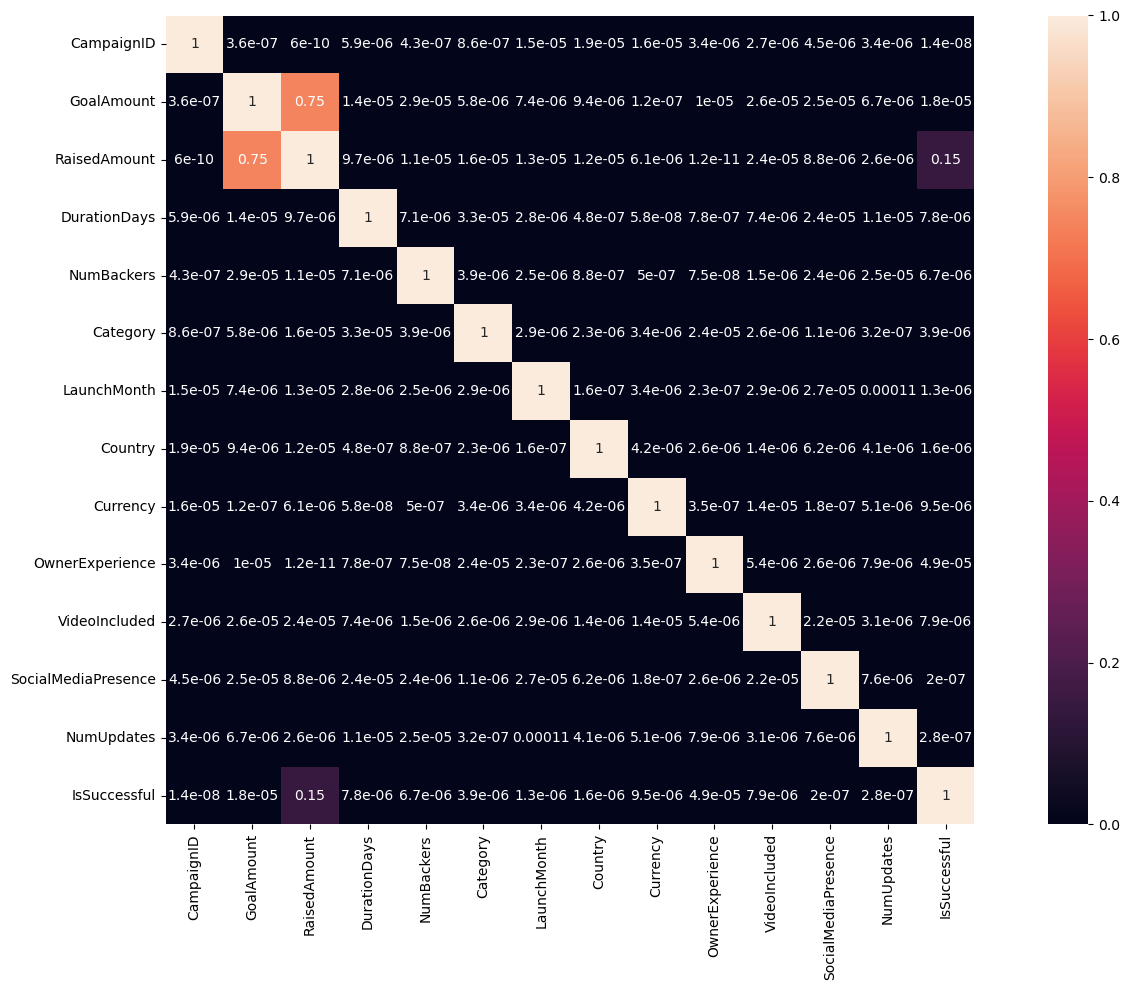

In [778]:
corr = df.corr().abs()
corr = corr ** 2
plt.figure(figsize = (15,10))
sns.heatmap(corr, annot=True, square = True)
plt.tight_layout()
plt.show()

In [790]:
feature_selection = [cols for cols in corr.columns if abs(corr[cols]["IsSuccessful"] >= 0.000001)]
print(f" Best Features with correlation more than 0.3: {feature_selection}\n")
df[feature_selection].head()

 Best Features with correlation more than 0.3: ['GoalAmount', 'RaisedAmount', 'DurationDays', 'NumBackers', 'Category', 'LaunchMonth', 'Country', 'Currency', 'OwnerExperience', 'VideoIncluded', 'IsSuccessful']



,GoalAmount,RaisedAmount,DurationDays,NumBackers,Category,LaunchMonth,Country,Currency,OwnerExperience,VideoIncluded,IsSuccessful
0,76159,73518.028955,15,1903,1,11,0,3,11,1,0
1,69394,60068.683288,49,469,0,10,0,3,7,1,0
2,18652,22958.153470,58,148,1,3,4,2,17,0,1
3,19487,24229.048390,39,780,1,10,2,0,10,0,1
4,26734,17984.630311,68,1622,2,11,0,0,12,1,0


In [792]:
df = df[feature_selection]
df

,GoalAmount,RaisedAmount,DurationDays,NumBackers,Category,LaunchMonth,Country,Currency,OwnerExperience,VideoIncluded,IsSuccessful
0,76159,73518.028955,15,1903,1,11,0,3,11,1,0
1,69394,60068.683288,49,469,0,10,0,3,7,1,0
2,18652,22958.153470,58,148,1,3,4,2,17,0,1
3,19487,24229.048390,39,780,1,10,2,0,10,0,1
4,26734,17984.630311,68,1622,2,11,0,0,12,1,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,80417,112068.932642,26,870,3,10,3,0,6,0,1
99996,85052,100430.502040,78,1146,1,10,4,4,8,0,1
99997,68407,102020.936312,87,636,0,7,3,2,2,1,1
99998,59749,67026.111706,51,1276,3,1,0,1,10,1,1


In [794]:
scacle = MinMaxScaler()
df = pd.DataFrame(scacle.fit_transform(df), columns = df.columns)
df.head()

,GoalAmount,RaisedAmount,DurationDays,NumBackers,Category,LaunchMonth,Country,Currency,OwnerExperience,VideoIncluded,IsSuccessful
0,0.759189,0.490818,0.000000,0.951735,0.25,1.000000,0.0,0.75,0.578947,1.0,0.0
1,0.690855,0.400378,0.459459,0.230769,0.00,0.909091,0.0,0.75,0.368421,1.0,0.0
2,0.178305,0.150828,0.581081,0.069382,0.25,0.272727,1.0,0.50,0.894737,0.0,1.0
3,0.186739,0.159374,0.324324,0.387129,0.25,0.909091,0.5,0.00,0.526316,0.0,1.0
4,0.259942,0.117383,0.716216,0.810458,0.50,1.000000,0.0,0.00,0.631579,1.0,0.0


In [796]:
x = df.drop("IsSuccessful", axis = 1)
y = df["IsSuccessful"]

In [798]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

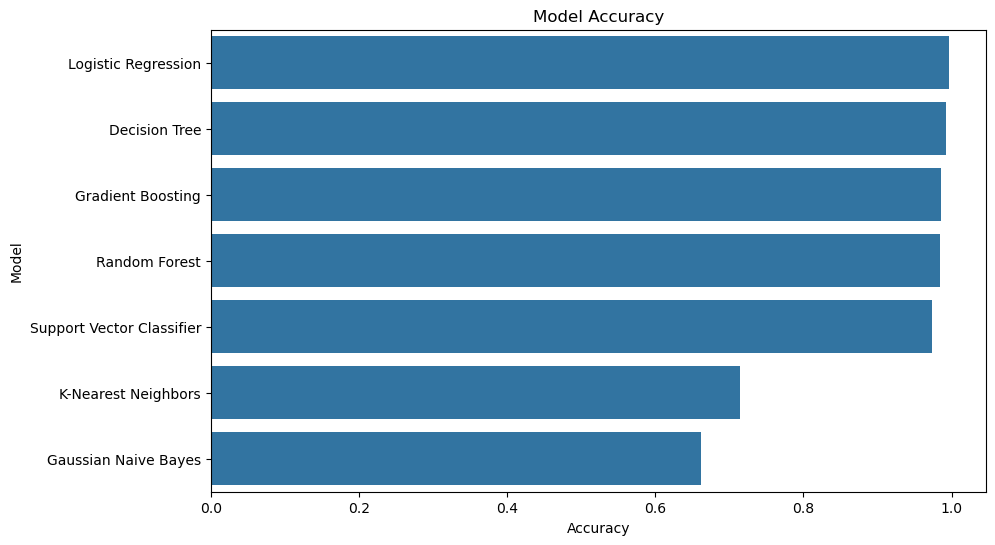

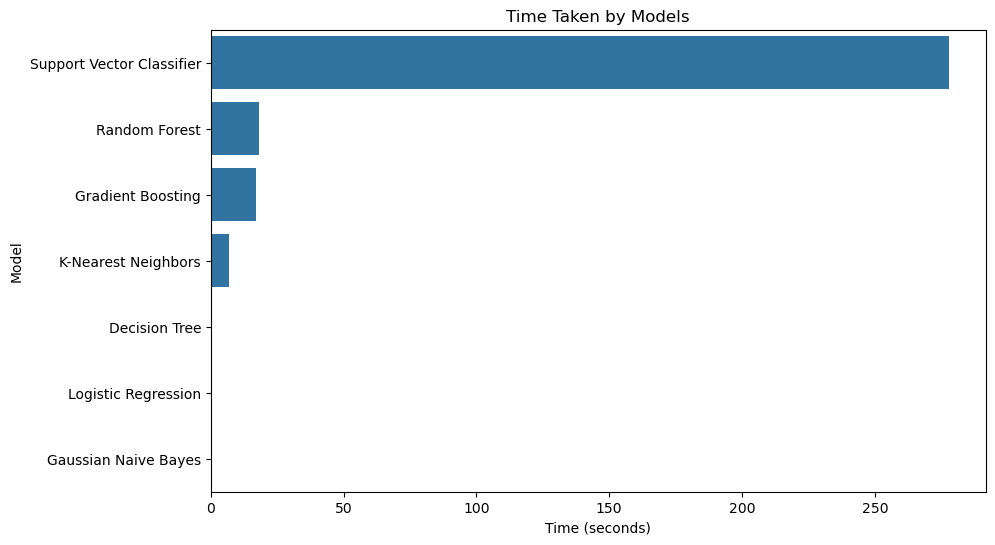

In [800]:
# List of classifiers
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    GaussianNB()
]

# Names of classifiers
classifier_names = [
    'Logistic Regression',
    'K-Nearest Neighbors',
    'Support Vector Classifier',
    'Decision Tree',
    'Random Forest',
    'Gradient Boosting',
    'Gaussian Naive Bayes'
]

# Store results in a list
results = []

# Loop through classifiers
for name, clf in zip(classifier_names, classifiers):
    start_time = time.time()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    end_time = time.time()
    duration = end_time - start_time
    
    # Append the results
    results.append({'Model': name, 'Accuracy': accuracy, 'Time Taken': duration})

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=results_df.sort_values(by='Accuracy', ascending=False))
plt.title('Model Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Time Taken', y='Model', data=results_df.sort_values(by='Time Taken', ascending=False))
plt.title('Time Taken by Models')
plt.xlabel('Time (seconds)')
plt.ylabel('Model')
plt.show()